In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [4]:
# Another classic non-linear shape.
X_moon, y_moon = make_moons(
    n_samples=100,
    noise=0.1,
    random_state=41
)

In [10]:
X_moon.shape,y_moon.shape

((100, 2), (100,))

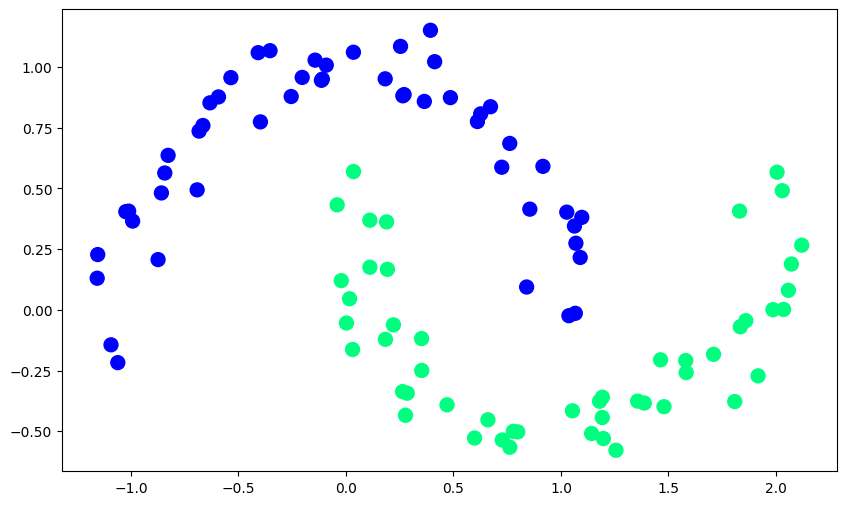

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon,cmap='winter',s=100)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [13]:
clf.fit(X_moon,y_moon)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<Axes: >

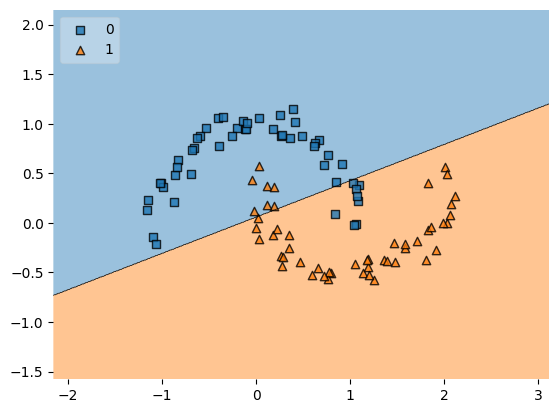

In [15]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_moon, y_moon.astype('int'), clf, legend=2)

In [17]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X_moon,y_moon,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

# using plolynomial logistic regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X_moon)

In [19]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y_moon,scoring='accuracy',cv=10))

np.float64(0.93)

In [20]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

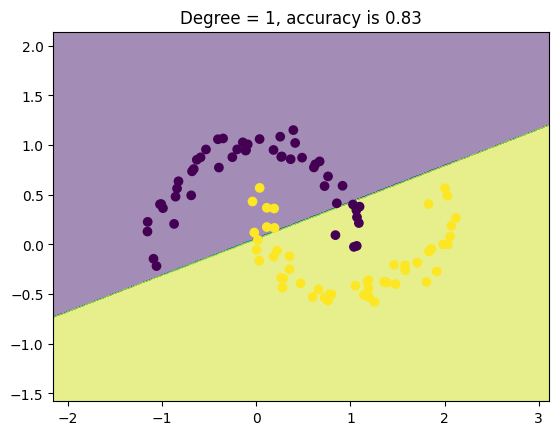

In [21]:
plot_decision_boundary(X_moon,y_moon)

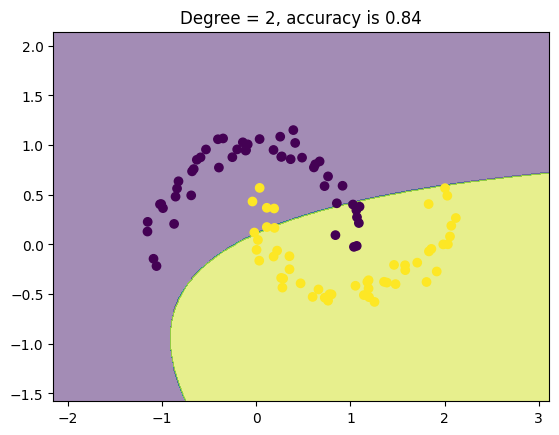

In [22]:
plot_decision_boundary(X_moon,y_moon,degree=2)

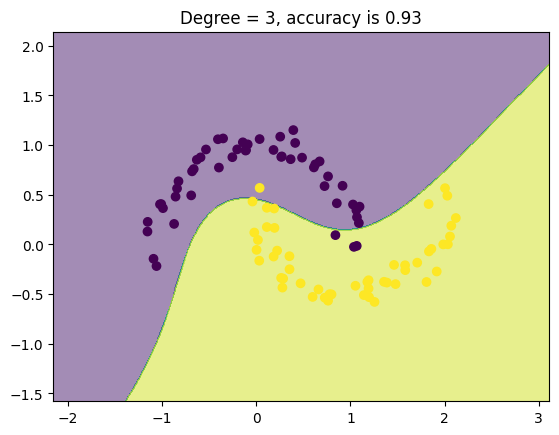

In [23]:
plot_decision_boundary(X_moon,y_moon,degree=3)

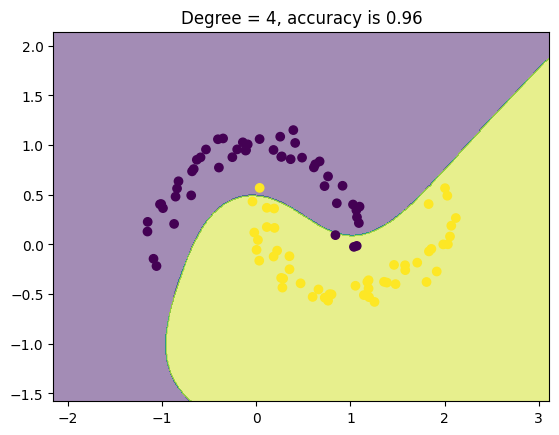

In [24]:
plot_decision_boundary(X_moon,y_moon,degree=4)

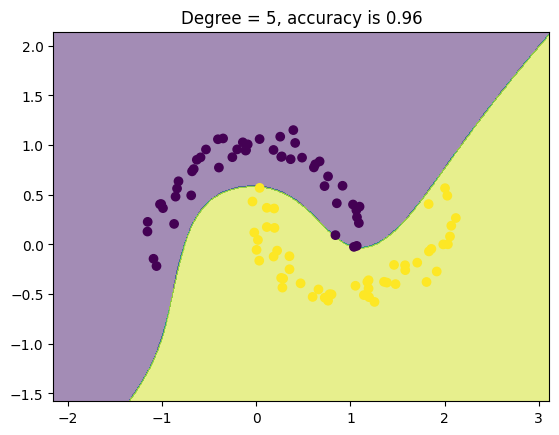

In [25]:
plot_decision_boundary(X_moon,y_moon,degree=5)

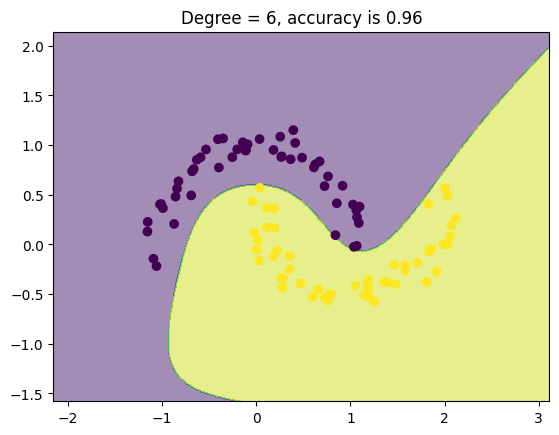

In [26]:
plot_decision_boundary(X_moon,y_moon,degree=6)

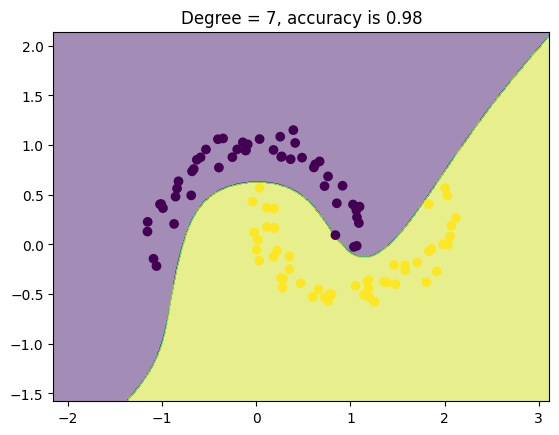

In [27]:
plot_decision_boundary(X_moon,y_moon,degree=7)

In [41]:
# 7 is optimal